In [206]:
import jieba
import jieba.analyse
from gensim import corpora
from gensim.models import TfidfModel
from gensim.matutils import corpus2dense, corpus2csc
from sklearn.cluster import KMeans

texts = [
    '中国人民解放军赢得了抗日战争的胜利',
    '中国人民解放军赢得了朝鲜战争的胜利',
    '八路军进入了抗日战争阶段',
    '印度军在边境与我军发生了冲突',
    '鹿晗是大家喜欢的大众偶像，他会唱歌',
    '韩红歌唱的很不错，但是因为各种原因，长相不好看',
    '好声音里有很多唱歌好的人，其中有解放军',
    '一场歌唱的战争已经打响，大家凭借歌唱实例进行比拼'
]

In [207]:
#datasets = [jieba.analyse.extract_tags(line, topK=5, withWeight=False, allowPOS=()) for line in texts]
content = open("f:/data/complaint1.txt", 'r', encoding="GBK", errors='ignore').read()
texts = content.split("\n")
datasets = [jieba.lcut(line) for line in texts]

In [208]:

dct=corpora.Dictionary(datasets)
corpus = [dct.doc2bow(line) for line in datasets]
model = TfidfModel(corpus)
corpus_tfidf = model[corpus]
corpus_tfidf_sparse = corpus2csc(corpus_tfidf)

In [209]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
import numpy as np

svd = TruncatedSVD(100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer) 
train_data = lsa.fit_transform(corpus_tfidf_sparse.T)

#clusters = KMeans(n_clusters=2, max_iter=100, n_init=1, verbose=False, init=np.array([train_data[0], train_data[-2]])).fit_predict(train_data)
clusters = KMeans(n_clusters=20, max_iter=100, n_init=1, verbose=False, init="k-means++").fit_predict(train_data)
clusters

array([ 4,  7, 14, ..., 15,  0,  7])

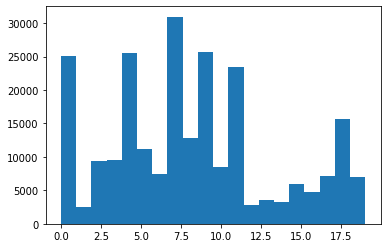

In [211]:
import matplotlib.pyplot as plt
plt.hist(clusters, bins=20)
plt.show()

In [213]:
import pandas as pd

df = pd.DataFrame(texts)
df["type"] = clusters

df.head()

,0,type
0,<Guid dataid=200601002638376/>询问用户：为准确排查您反映的问题...,4
1,设备诊断:掉电/离线/XX，请重新连接网线，并关闭电源5分钟后再测试!;<br/>开户地址:...,7
2,移动业务→网络质量→手机上网（4G）→全局流转→功能使用→网速慢或网页无法打开→全局流转（1...,14
3,移动业务→网络质量→手机上网（4G）→全局流转→功能使用→区域无信号→全局流转问题描述:四川...,14
4,设备诊断:掉电/离线/XX，请重新连接网线，并关闭电源5分钟后再测试!;<br/>开户地址:...,7


In [215]:
df.to_csv("f:/data/cluster_result.csv", encoding="GBK")